In [1]:
# load libraries
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [4]:
# load data
data = pd.read_csv('data/Dataset-Kmeans-xclara.csv', error_bad_lines=False)
print(data.shape)

(3000, 3)


C:\Users\dell\AppData\Local\Temp\ipykernel_8340\2173519363.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv('data/Dataset-Kmeans-xclara.csv', error_bad_lines=False)


In [5]:
data.head()

,V1,V2,Unnamed: 2
0,2.072345,-3.241693,NaN
1,17.936710,15.784810,NaN
2,1.083576,7.319176,NaN
3,11.120670,14.406780,NaN
4,23.711550,2.557729,NaN


In [8]:
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
data.head()

,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


In [10]:
data.describe()

,V1,V2
count,3000.000000,3000.000000
mean,40.611358,22.862141
std,25.859054,31.759714
min,-22.495990,-38.795500
25%,18.462790,-4.003494
50%,41.552210,13.827390
75%,62.249480,55.729100
max,104.376600,87.313700


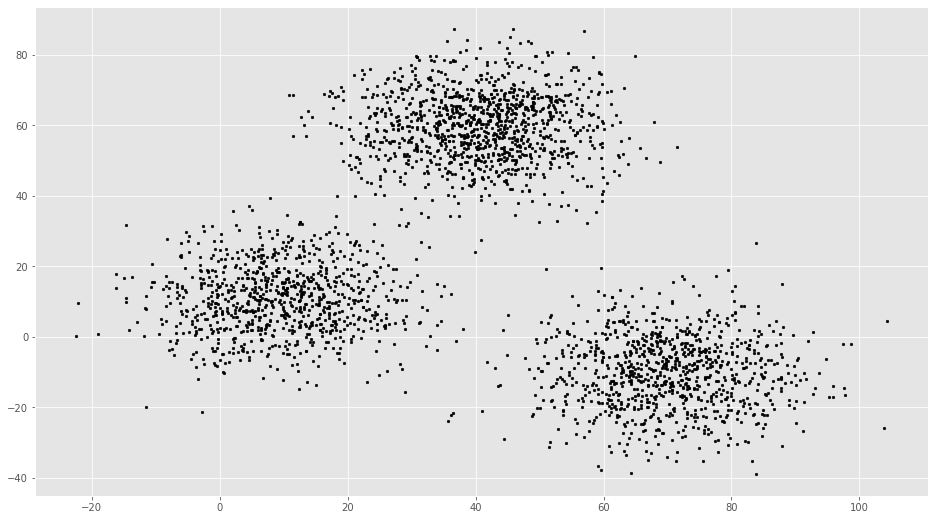

In [9]:
# Gettign the values and plotting them
f1 = data['V1'].values
f2 = data['V2'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=7)

In [11]:
X

array([[  2.072345,  -3.241693],
       [ 17.93671 ,  15.78481 ],
       [  1.083576,   7.319176],
       ...,
       [ 64.46532 , -10.50136 ],
       [ 90.72282 , -12.25584 ],
       [ 64.87976 , -24.87731 ]])

In [17]:
# Euclidean distance calculator
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [12]:
# Number of clusters
k = 3
# X coordinates of random centroids
C_x = np.random.randint(0, np.max(X)-20, size=k)
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X)-20, size=k)

C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)

[[76. 25.]
 [57. 45.]
 [ 8. 40.]]


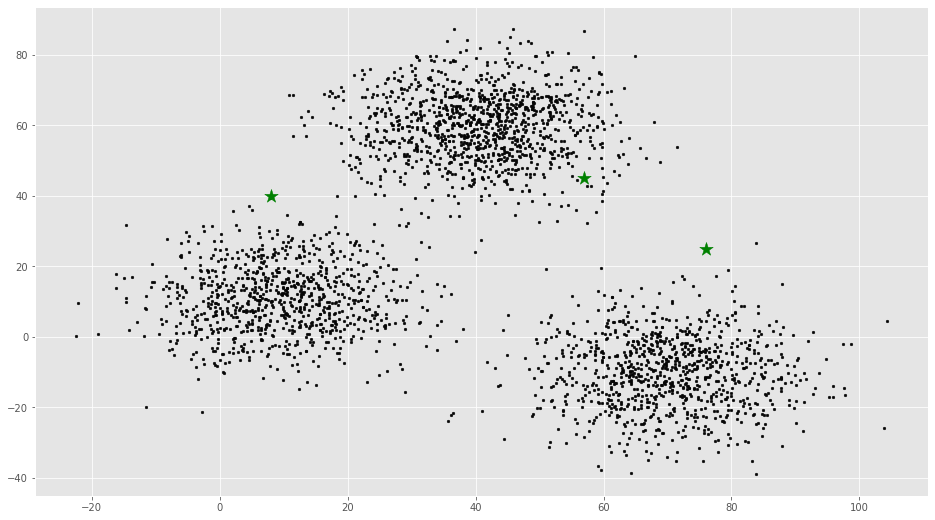

In [14]:
# Plotting along with the centroids
plt.scatter(f1, f2, c= '#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

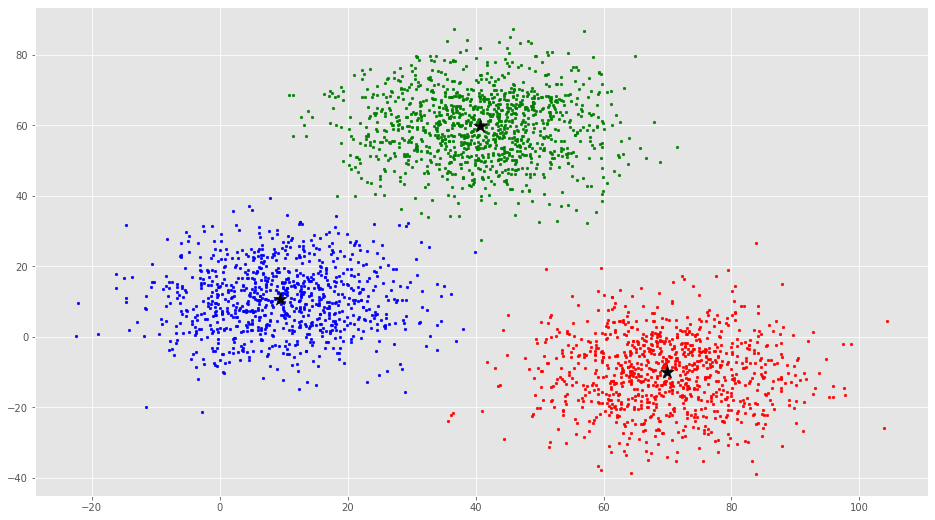

In [19]:
# To store the value of centroids whrn it updates
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
# Error function - distance between new centroids and old centroids
error = dist(C, C_old, None)
# Loop will run till the error becomes zero
while error != 0:
    # Asiign each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Store the old centroid value
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j]==i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
    points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
    ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')